# Project Name: Google Quantum AI with The Jordan-Wigner and Bravyi-Kitaev Transforms
# Contributor: Rajeev Singh Sisodiya
# Project Details:
The Jordan-Wigner Transform:

This is the more straightforward approach. It represents each fermionic creation (annihilation) operator with a pair of Pauli operators acting on qubits.
While conceptually simple, this mapping introduces "phase factors" that complicate certain calculations and limit its efficiency for some systems.

The Bravyi-Kitaev Transform:

This more sophisticated method employs clever mathematical structures like braid groups and Majorana fermions to achieve a mapping with several advantages:
Reduced complexity: Bravyi-Kitaev requires only O(log n) qubit operations to simulate one fermionic operation, compared to O(n) for Jordan-Wigner. This significantly improves efficiency for large systems.
No phase factors: The mapping avoids the problematic phase factors, simplifying calculations and improving accuracy.

Flexibility: Bravyi-Kitaev provides greater flexibility in handling certain types of interactions. However, choosing between these methods depends on your specific needs:

1. For small systems or those with limited interaction types, Jordan-Wigner might suffice due to its ease of implementation.

2. For larger systems or those with complex interactions, Bravyi-Kitaev often reigns supreme due to its superior efficiency and accuracy.

Ultimately, understanding both methods and their trade-offs empowers you to choose the right tool for your quantum simulation endeavors.

# Ladder operators and the canonical anticommutation relations
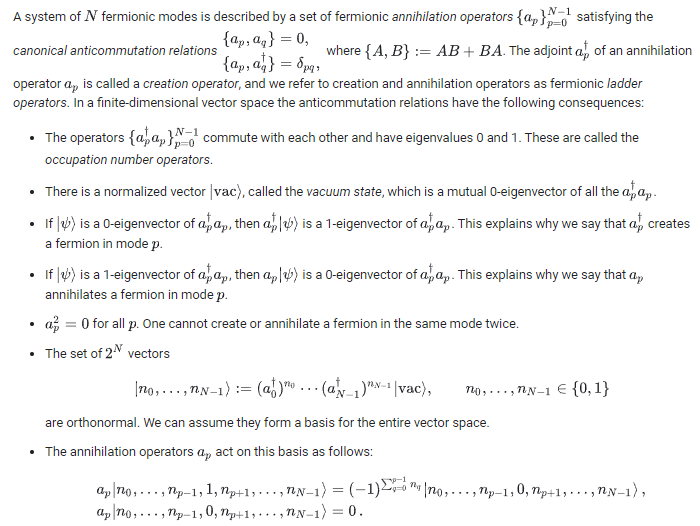

# Mapping fermions to qubits with transforms
To simulate a system of fermions on a quantum computer, we must choose a representation of the ladder operators on the Hilbert space of the qubits. In other words, we must designate a set of qubit operators (matrices) which satisfy the canonical anticommutation relations. Qubit operators are written in terms of the Pauli matrices X,Y and Z.

In OpenFermion a representation is specified by a transform function which maps fermionic operators (typically instances of FermionOperator) to qubit operators (instances of QubitOperator). In this demo we will discuss the Jordan-Wigner and Bravyi-Kitaev transforms, which are implemented by the functions jordan_wigner and bravyi_kitaev.

# The Jordan-Wigner Transform
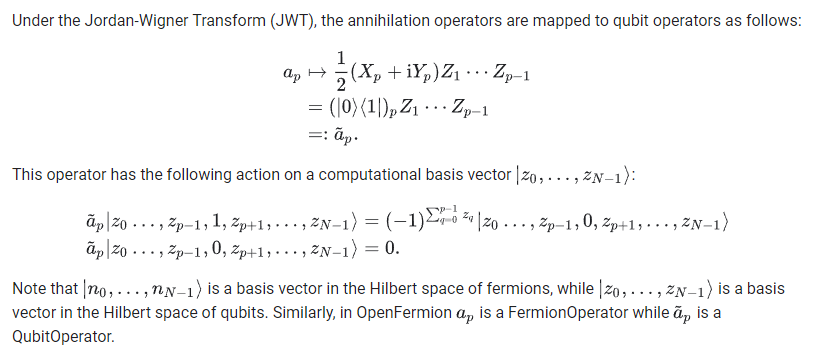

Let's instantiate some FermionOperators, map them to QubitOperators using the JWT, and check that the resulting operators satisfy the expected relations.

In [ ]:
!!pip install openfermion

In [3]:
from openfermion import *

# Create some ladder operators
annihilate_2 = FermionOperator('2')
create_2 = FermionOperator('2^')
annihilate_5 = FermionOperator('5')
create_5 = FermionOperator('5^')

# Construct occupation number operators
num_2 = create_2 * annihilate_2
num_5 = create_5 * annihilate_5

# Map FermionOperators to QubitOperators using the JWT
annihilate_2_jw = jordan_wigner(annihilate_2)
create_2_jw = jordan_wigner(create_2)
annihilate_5_jw = jordan_wigner(annihilate_5)
create_5_jw = jordan_wigner(create_5)
num_2_jw = jordan_wigner(num_2)
num_5_jw = jordan_wigner(num_5)

# Create QubitOperator versions of zero and identity
zero = QubitOperator()
identity = QubitOperator(())

# Check the canonical anticommutation relations
assert anticommutator(annihilate_5_jw, annihilate_2_jw) == zero
assert anticommutator(annihilate_5_jw, annihilate_5_jw) == zero
assert anticommutator(annihilate_5_jw, create_2_jw) == zero
assert anticommutator(annihilate_5_jw, create_5_jw) == identity

# Check that the occupation number operators commute
assert commutator(num_2_jw, num_5_jw) == zero

# Print some output
print("annihilate_2_jw = \n{}".format(annihilate_2_jw))
print('')
print("create_2_jw = \n{}".format(create_2_jw))
print('')
print("annihilate_5_jw = \n{}".format(annihilate_5_jw))
print('')
print("create_5_jw = \n{}".format(create_5_jw))
print('')
print("num_2_jw = \n{}".format(num_2_jw))
print('')
print("num_5_jw = \n{}".format(num_5_jw))

annihilate_2_jw = 
0.5 [Z0 Z1 X2] +
0.5j [Z0 Z1 Y2]

create_2_jw = 
0.5 [Z0 Z1 X2] +
-0.5j [Z0 Z1 Y2]

annihilate_5_jw = 
0.5 [Z0 Z1 Z2 Z3 Z4 X5] +
0.5j [Z0 Z1 Z2 Z3 Z4 Y5]

create_5_jw = 
0.5 [Z0 Z1 Z2 Z3 Z4 X5] +
-0.5j [Z0 Z1 Z2 Z3 Z4 Y5]

num_2_jw = 
(0.5+0j) [] +
(-0.5+0j) [Z2]

num_5_jw = 
(0.5+0j) [] +
(-0.5+0j) [Z5]


# The parity transform
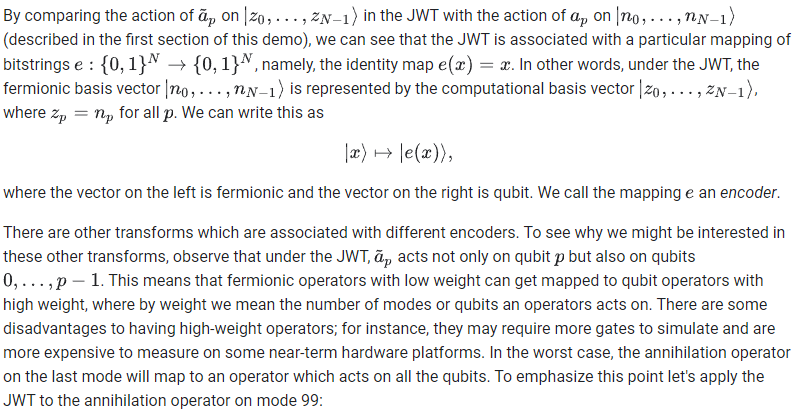

In [4]:
print(jordan_wigner(FermionOperator('99')))

0.5 [Z0 Z1 Z2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 Z10 Z11 Z12 Z13 Z14 Z15 Z16 Z17 Z18 Z19 Z20 Z21 Z22 Z23 Z24 Z25 Z26 Z27 Z28 Z29 Z30 Z31 Z32 Z33 Z34 Z35 Z36 Z37 Z38 Z39 Z40 Z41 Z42 Z43 Z44 Z45 Z46 Z47 Z48 Z49 Z50 Z51 Z52 Z53 Z54 Z55 Z56 Z57 Z58 Z59 Z60 Z61 Z62 Z63 Z64 Z65 Z66 Z67 Z68 Z69 Z70 Z71 Z72 Z73 Z74 Z75 Z76 Z77 Z78 Z79 Z80 Z81 Z82 Z83 Z84 Z85 Z86 Z87 Z88 Z89 Z90 Z91 Z92 Z93 Z94 Z95 Z96 Z97 Z98 X99] +
0.5j [Z0 Z1 Z2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 Z10 Z11 Z12 Z13 Z14 Z15 Z16 Z17 Z18 Z19 Z20 Z21 Z22 Z23 Z24 Z25 Z26 Z27 Z28 Z29 Z30 Z31 Z32 Z33 Z34 Z35 Z36 Z37 Z38 Z39 Z40 Z41 Z42 Z43 Z44 Z45 Z46 Z47 Z48 Z49 Z50 Z51 Z52 Z53 Z54 Z55 Z56 Z57 Z58 Z59 Z60 Z61 Z62 Z63 Z64 Z65 Z66 Z67 Z68 Z69 Z70 Z71 Z72 Z73 Z74 Z75 Z76 Z77 Z78 Z79 Z80 Z81 Z82 Z83 Z84 Z85 Z86 Z87 Z88 Z89 Z90 Z91 Z92 Z93 Z94 Z95 Z96 Z97 Z98 Y99]


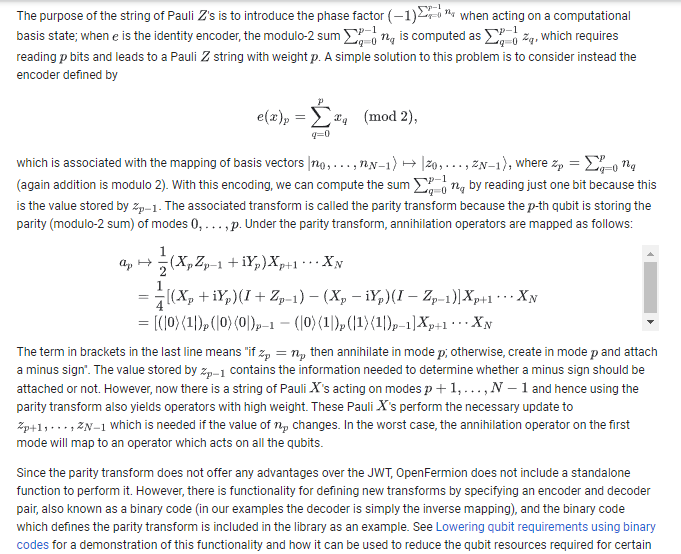 applications

Let's use this functionality to map our previously instantiated FermionOperators to QubitOperators using the parity transform with 10 total modes and check that the resulting operators satisfy the expected relations.

In [5]:
# Set the number of modes in the system
n_modes = 10

# Define a function to perform the parity transform
def parity(fermion_operator, n_modes):
    return binary_code_transform(fermion_operator, parity_code(n_modes))

# Map FermionOperators to QubitOperators using the parity transform
annihilate_2_parity = parity(annihilate_2, n_modes)
create_2_parity = parity(create_2, n_modes)
annihilate_5_parity = parity(annihilate_5, n_modes)
create_5_parity = parity(create_5, n_modes)
num_2_parity = parity(num_2, n_modes)
num_5_parity = parity(num_5, n_modes)

# Check the canonical anticommutation relations
assert anticommutator(annihilate_5_parity, annihilate_2_parity) == zero
assert anticommutator(annihilate_5_parity, annihilate_5_parity) == zero
assert anticommutator(annihilate_5_parity, create_2_parity) == zero
assert anticommutator(annihilate_5_parity, create_5_parity) == identity

# Check that the occupation number operators commute
assert commutator(num_2_parity, num_5_parity) == zero

# Print some output
print("annihilate_2_parity = \n{}".format(annihilate_2_parity))
print('')
print("create_2_parity = \n{}".format(create_2_parity))
print('')
print("annihilate_5_parity = \n{}".format(annihilate_5_parity))
print('')
print("create_5_parity = \n{}".format(create_5_parity))
print('')
print("num_2_parity = \n{}".format(num_2_parity))
print('')
print("num_5_parity = \n{}".format(num_5_parity))

annihilate_2_parity = 
0.5 [Z1 X2 X3 X4 X5 X6 X7 X8 X9] +
0.5j [Y2 X3 X4 X5 X6 X7 X8 X9]

create_2_parity = 
0.5 [Z1 X2 X3 X4 X5 X6 X7 X8 X9] +
(-0-0.5j) [Y2 X3 X4 X5 X6 X7 X8 X9]

annihilate_5_parity = 
0.5 [Z4 X5 X6 X7 X8 X9] +
0.5j [Y5 X6 X7 X8 X9]

create_5_parity = 
0.5 [Z4 X5 X6 X7 X8 X9] +
(-0-0.5j) [Y5 X6 X7 X8 X9]

num_2_parity = 
0.5 [] +
-0.5 [Z1 Z2]

num_5_parity = 
0.5 [] +
-0.5 [Z4 Z5]


Now let's map one of the FermionOperators again but with the total number of modes set to 100.

In [6]:
print(parity(annihilate_2, 100))

0.5 [Z1 X2 X3 X4 X5 X6 X7 X8 X9 X10 X11 X12 X13 X14 X15 X16 X17 X18 X19 X20 X21 X22 X23 X24 X25 X26 X27 X28 X29 X30 X31 X32 X33 X34 X35 X36 X37 X38 X39 X40 X41 X42 X43 X44 X45 X46 X47 X48 X49 X50 X51 X52 X53 X54 X55 X56 X57 X58 X59 X60 X61 X62 X63 X64 X65 X66 X67 X68 X69 X70 X71 X72 X73 X74 X75 X76 X77 X78 X79 X80 X81 X82 X83 X84 X85 X86 X87 X88 X89 X90 X91 X92 X93 X94 X95 X96 X97 X98 X99] +
0.5j [Y2 X3 X4 X5 X6 X7 X8 X9 X10 X11 X12 X13 X14 X15 X16 X17 X18 X19 X20 X21 X22 X23 X24 X25 X26 X27 X28 X29 X30 X31 X32 X33 X34 X35 X36 X37 X38 X39 X40 X41 X42 X43 X44 X45 X46 X47 X48 X49 X50 X51 X52 X53 X54 X55 X56 X57 X58 X59 X60 X61 X62 X63 X64 X65 X66 X67 X68 X69 X70 X71 X72 X73 X74 X75 X76 X77 X78 X79 X80 X81 X82 X83 X84 X85 X86 X87 X88 X89 X90 X91 X92 X93 X94 X95 X96 X97 X98 X99]


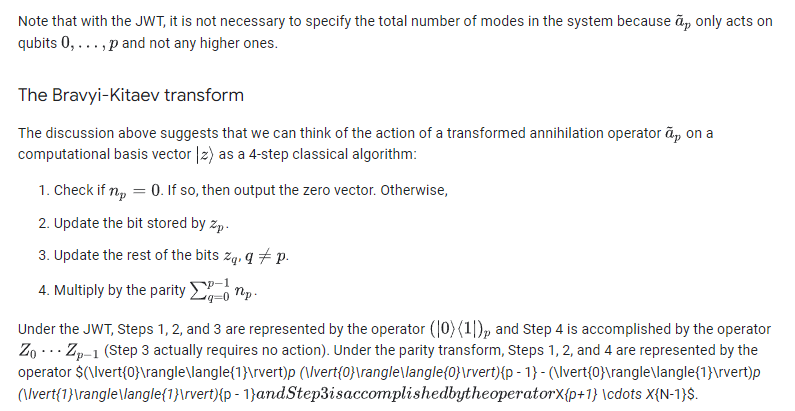
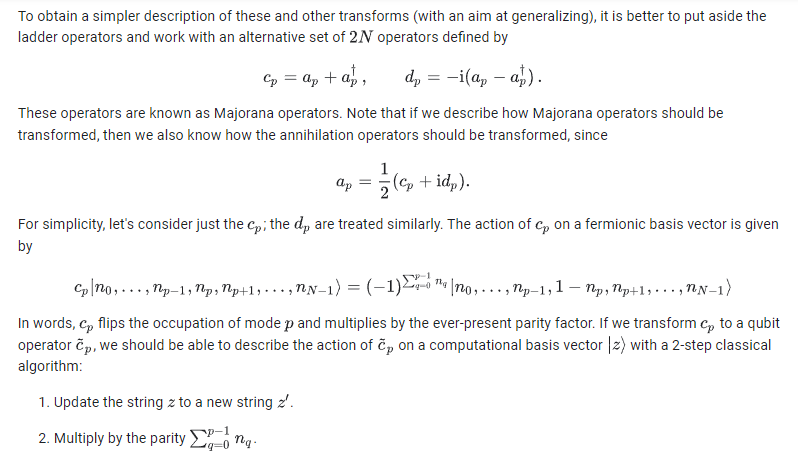
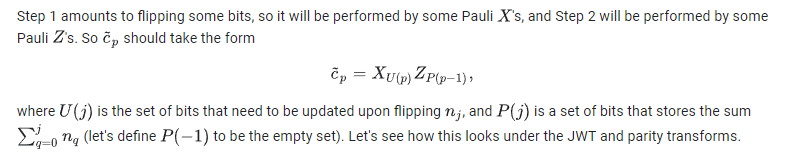

In [7]:
# Create a Majorana operator from our existing operators
c_5 = annihilate_5 + create_5

# Set the number of modes (required for the parity transform)
n_modes = 10

# Transform the Majorana operator to a QubitOperator in two different ways
c_5_jw = jordan_wigner(c_5)
c_5_parity = parity(c_5, n_modes)

# Print some output
print("c_5_jw = \n{}".format(c_5_jw))
print('')
print("c_5_parity = \n{}".format(c_5_parity))

c_5_jw = 
1.0 [Z0 Z1 Z2 Z3 Z4 X5]

c_5_parity = 
1.0 [Z4 X5 X6 X7 X8 X9]


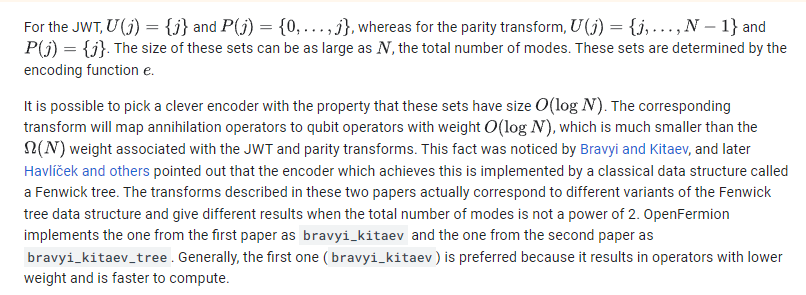

Let's transform our previously instantiated Majorana operator using the Bravyi-Kitaev transform.



In [8]:
c_5_bk = bravyi_kitaev(c_5, n_modes)
print("c_5_bk = \n{}".format(c_5_bk))

c_5_bk = 
1.0 [Z3 Z4 X5 X7]


The advantage of the Bravyi-Kitaev transform is not apparent in a system with so few modes. Let's look at a system with 100 modes.

In [9]:
n_modes = 100

# Initialize some Majorana operators
c_17 = FermionOperator('[17] + [17^]')
c_50 = FermionOperator('[50] + [50^]')
c_73 = FermionOperator('[73] + [73^]')

# Map to QubitOperators
c_17_jw = jordan_wigner(c_17)
c_50_jw = jordan_wigner(c_50)
c_73_jw = jordan_wigner(c_73)
c_17_parity = parity(c_17, n_modes)
c_50_parity = parity(c_50, n_modes)
c_73_parity = parity(c_73, n_modes)
c_17_bk = bravyi_kitaev(c_17, n_modes)
c_50_bk = bravyi_kitaev(c_50, n_modes)
c_73_bk = bravyi_kitaev(c_73, n_modes)

# Print some output
print("Jordan-Wigner\n"
      "-------------")
print("c_17_jw = \n{}".format(c_17_jw))
print('')
print("c_50_jw = \n{}".format(c_50_jw))
print('')
print("c_73_jw = \n{}".format(c_73_jw))
print('')
print("Parity\n"
      "------")
print("c_17_parity = \n{}".format(c_17_parity))
print('')
print("c_50_parity = \n{}".format(c_50_parity))
print('')
print("c_73_parity = \n{}".format(c_73_parity))
print('')
print("Bravyi-Kitaev\n"
      "-------------")
print("c_17_bk = \n{}".format(c_17_bk))
print('')
print("c_50_bk = \n{}".format(c_50_bk))
print('')
print("c_73_bk = \n{}".format(c_73_bk))

Jordan-Wigner
-------------
c_17_jw = 
1.0 [Z0 Z1 Z2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 Z10 Z11 Z12 Z13 Z14 Z15 Z16 X17]

c_50_jw = 
1.0 [Z0 Z1 Z2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 Z10 Z11 Z12 Z13 Z14 Z15 Z16 Z17 Z18 Z19 Z20 Z21 Z22 Z23 Z24 Z25 Z26 Z27 Z28 Z29 Z30 Z31 Z32 Z33 Z34 Z35 Z36 Z37 Z38 Z39 Z40 Z41 Z42 Z43 Z44 Z45 Z46 Z47 Z48 Z49 X50]

c_73_jw = 
1.0 [Z0 Z1 Z2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 Z10 Z11 Z12 Z13 Z14 Z15 Z16 Z17 Z18 Z19 Z20 Z21 Z22 Z23 Z24 Z25 Z26 Z27 Z28 Z29 Z30 Z31 Z32 Z33 Z34 Z35 Z36 Z37 Z38 Z39 Z40 Z41 Z42 Z43 Z44 Z45 Z46 Z47 Z48 Z49 Z50 Z51 Z52 Z53 Z54 Z55 Z56 Z57 Z58 Z59 Z60 Z61 Z62 Z63 Z64 Z65 Z66 Z67 Z68 Z69 Z70 Z71 Z72 X73]

Parity
------
c_17_parity = 
1.0 [Z16 X17 X18 X19 X20 X21 X22 X23 X24 X25 X26 X27 X28 X29 X30 X31 X32 X33 X34 X35 X36 X37 X38 X39 X40 X41 X42 X43 X44 X45 X46 X47 X48 X49 X50 X51 X52 X53 X54 X55 X56 X57 X58 X59 X60 X61 X62 X63 X64 X65 X66 X67 X68 X69 X70 X71 X72 X73 X74 X75 X76 X77 X78 X79 X80 X81 X82 X83 X84 X85 X86 X87 X88 X89 X90 X91 X92 X93 X94 X95 X96 X97 X98 X99]

c_50

Now let's go back to a system with 10 modes and check that the Bravyi-Kitaev transformed operators satisfy the expected relations.

In [10]:
# Set the number of modes in the system
n_modes = 10

# Map FermionOperators to QubitOperators using the Bravyi-Kitaev transform
annihilate_2_bk = bravyi_kitaev(annihilate_2, n_modes)
create_2_bk = bravyi_kitaev(create_2, n_modes)
annihilate_5_bk = bravyi_kitaev(annihilate_5, n_modes)
create_5_bk = bravyi_kitaev(create_5, n_modes)
num_2_bk = bravyi_kitaev(num_2, n_modes)
num_5_bk = bravyi_kitaev(num_5, n_modes)

# Check the canonical anticommutation relations
assert anticommutator(annihilate_5_bk, annihilate_2_bk) == zero
assert anticommutator(annihilate_5_bk, annihilate_5_bk) == zero
assert anticommutator(annihilate_5_bk, create_2_bk) == zero
assert anticommutator(annihilate_5_bk, create_5_bk) == identity

# Check that the occupation number operators commute
assert commutator(num_2_bk, num_5_bk) == zero

# Print some output
print("annihilate_2_bk = \n{}".format(annihilate_2_bk))
print('')
print("create_2_bk = \n{}".format(create_2_bk))
print('')
print("annihilate_5_bk = \n{}".format(annihilate_5_bk))
print('')
print("create_5_bk = \n{}".format(create_5_bk))
print('')
print("num_2_bk = \n{}".format(num_2_bk))
print('')
print("num_5_bk = \n{}".format(num_5_bk))

annihilate_2_bk = 
0.5 [Z1 X2 X3 X7] +
0.5j [Z1 Y2 X3 X7]

create_2_bk = 
0.5 [Z1 X2 X3 X7] +
-0.5j [Z1 Y2 X3 X7]

annihilate_5_bk = 
0.5 [Z3 Z4 X5 X7] +
0.5j [Z3 Y5 X7]

create_5_bk = 
0.5 [Z3 Z4 X5 X7] +
-0.5j [Z3 Y5 X7]

num_2_bk = 
(0.5+0j) [] +
(-0.5+0j) [Z2]

num_5_bk = 
(0.5+0j) [] +
(-0.5+0j) [Z4 Z5]
